In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({
    "axes.prop_cycle": plt.cycler("color", ['#000000', '#1b6989', '#e69f00', '#009e73', '#f0e442', '#50b4e9', '#d55e00', '#cc79a7']),
    "figure.figsize": [12.0, 5.0],
    "font.serif": ['Palatino',
                   'Palatino Linotype',
                   'Palatino LT STD',
                   'Book Antiqua',
                   'Georgia',
                   'DejaVu Serif'],
    'font.family': 'serif',
    'figure.facecolor': '#fffff8',
    'axes.facecolor': '#fffff8',
    'figure.constrained_layout.use': True,
    'font.size': 14.0,
    'hist.bins': 'auto',
    'lines.linewidth': 3.0,
    'lines.markeredgewidth': 2.0,
    'lines.markerfacecolor': 'none',
    'lines.markersize': 8.0, 
})

## Differentiable Programming

Jax is a very lightweight framework for differnentiable programming. It is convention to import `jax.numpy` as `np`, and ordinary (original?) numpy as `onp`, but I do not do that here, since the notebook uses a lot of numpy.

In [3]:
import jax.numpy as jnp
from jax import grad, vmap

print(jnp.sin(0.), grad(jnp.sin)(0.))

0.0 1.0


/home/colin/miniconda3/envs/bayes_course/lib/python3.6/site-packages/jax/lib/xla_bridge.py:115: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


Note that this is exact, not an approximation!

In [4]:
def my_func(x):
    """
    f(x) = sin(x) + x^2 + e^{x^2}
    f'(x) = cos(x) + 2x + 2xe^{x^2}
    """
    return jnp.sin(x) + x ** 2 + jnp.exp(x ** 2)

my_func_prime = grad(my_func)

print(f"Automatic:\t{my_func_prime(1.)}")
print(f"Manual:\t\t{(np.cos(1.) + (2 * 1) + (2 * 1 * np.exp(1 ** 2))).astype(np.float32)}")

Automatic:	7.976865768432617
Manual:		7.976865768432617


Gradients work on functions $f: \mathbb{R}^n \rightarrow \mathbb{R}$, and $Df : \mathbb{R}^n \rightarrow \mathbb{R}^n$. This means that gradients are not vectorized! You can use `vmap` to vectorize them!

In [5]:
cos = grad(jnp.sin)
# cos(np.linspace(0, 1))  # ERROR!
vmap(cos)(np.linspace(0, 1))

DeviceArray([1.        , 0.99979174, 0.99916714, 0.99812639, 0.99666989,
             0.99479836, 0.99251246, 0.98981327, 0.98670179, 0.98317939,
             0.97924751, 0.97490782, 0.97016209, 0.96501225, 0.95946056,
             0.95350927, 0.9471609 , 0.940418  , 0.93328345, 0.92576021,
             0.91785139, 0.90956032, 0.90089047, 0.89184541, 0.88242888,
             0.87264484, 0.86249739, 0.85199076, 0.84112918, 0.82991737,
             0.81835991, 0.80646163, 0.79422748, 0.78166252, 0.76877201,
             0.75556135, 0.74203598, 0.72820163, 0.71406394, 0.69962889,
             0.68490243, 0.66989076, 0.65460008, 0.63903677, 0.62320733,
             0.60711831, 0.59077638, 0.57418853, 0.55736148, 0.54030228],
            dtype=float32)

You can write functions that accept arguments of different dimensions!

In [6]:
grad_mse = grad(lambda x: jnp.mean(x * x))
grad_mse(np.linspace(0, 5, dtype=np.float32))

DeviceArray([0.        , 0.00408163, 0.00816326, 0.0122449 , 0.01632653,
             0.02040816, 0.0244898 , 0.02857143, 0.03265306, 0.03673469,
             0.04081633, 0.04489795, 0.04897959, 0.05306122, 0.05714286,
             0.06122449, 0.06530612, 0.06938776, 0.07346939, 0.07755102,
             0.08163265, 0.08571428, 0.08979591, 0.09387755, 0.09795918,
             0.10204081, 0.10612244, 0.11020409, 0.11428571, 0.11836734,
             0.12244897, 0.1265306 , 0.13061224, 0.13469388, 0.13877551,
             0.14285713, 0.14693877, 0.15102041, 0.15510204, 0.15918367,
             0.1632653 , 0.16734692, 0.17142856, 0.1755102 , 0.17959182,
             0.18367347, 0.18775511, 0.19183673, 0.19591837, 0.19999999],
            dtype=float32)

You can also take higher derivatives of functions $\mathbb{R} \rightarrow \mathbb{R}$ by repeatedly applying `grad`!

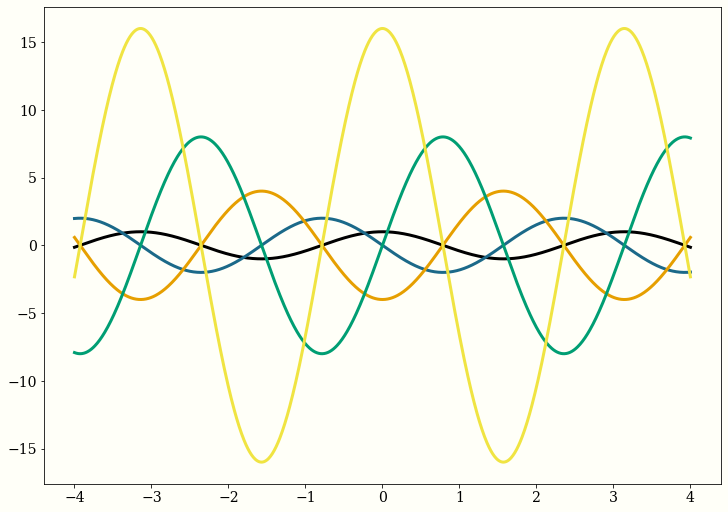

In [8]:
fig, ax = plt.subplots(figsize=(10, 7))

x = jnp.linspace(-4, 4, 1000)

my_func = lambda x : jnp.cos(2 * x)
ax.plot(x, my_func(x))
for _ in range(4):
    my_func = grad(my_func)
    ax.plot(x, vmap(my_func)(x))

### Exercise

1. Make the above plot, with the hyperbolic tangent function (`jnp.tanh`)
2. (Challenge!) Implement linear regression with gradient descent using jax. You will need to implement a loss function, and use 

$$
w' = w - \epsilon D\text{Loss}(w)
$$

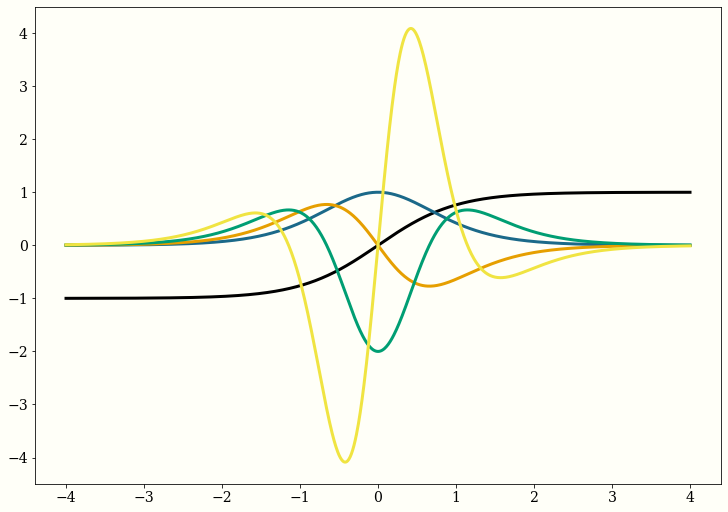

In [9]:
####################
fig, ax = plt.subplots(figsize=(10, 7))

x = jnp.linspace(-4, 4, 1000)

my_func = jnp.tanh
ax.plot(x, my_func(x))
for _ in range(4):
    my_func = grad(my_func)
    ax.plot(x, vmap(my_func)(x))
####################

In [10]:
np.random.seed(0)

ndims = 5
ndata = 100
X = np.random.randn(ndata, ndims)
w_ = np.random.randn(ndims)  # no peeking

noise_ = 0.1 * np.random.randn(ndata)
y_obs = X.dot(w_) + noise_

def mean_squared_error(w):
    """Use y_obs and X from the global namespace.
    
    Use jnp.dot(...) for matrix multiplication
    """
    ####################
    return jnp.mean((jnp.dot(X, w) - y_obs)**2)
    ####################
    
    
def gradient_descent(loss_func, epsilon=0.01, iterations=100, w_init=jnp.zeros_like(w_)):
    """Should return weights after applying gradient descent `iterations` times."""
    w_current = w_init
    ####################
    dloss = grad(loss_func)
    for _ in range(iterations):
        w_current -= epsilon * dloss(w_current)
    ####################
    return w_current

# These should be similar when you get it right!
print(gradient_descent(mean_squared_error), w_)

[ 0.3003775  -0.08701824  0.9306857  -0.20147875 -0.29284018] [ 0.38273243 -0.03424228  1.09634685 -0.2342158  -0.34745065]


## Pictures indicating Variational Inference

Variational inference attempts to fit a multivariate Gaussian to a posterior by minimizing the KL divergence. If your posterior is nearly Gaussian, this turns a very slow sampling procedure to a very fast optimization procedure! On the downside, it is *not* exact, and we mostly lack the theory to quantify how bad the approximate inference is!

Two "flavors" of variational inference use "mean field", or diagonal covariance, which is most common in ADVI implementations, and "full rank", which may blow out memory for large problems.

In [9]:
import theano
theano.config.compute_test_value = 'raise'  # funny bug when first making a theano variable

In [10]:
import pymc3 as pm
import theano.tensor as tt

def _get_bounds(samples):
    """Helper function to draw consistent bounds"""
    x_max, y_max = 0, 0
    for x_draws, y_draws in samples.values():
        x_max = max(x_max, np.abs(x_draws).max())
        y_max = max(y_max, np.abs(y_draws).max())
    top = max(x_max, y_max)
    return (-top, top)


def density_model(Ω):
    """This is the "modeling" step.  
    
    We are using PyMC3, and assuming we get an object Ω that represents some joint
    distribution. We require Ω to have two methods: `logp` and `random`. The logp should also
    be defined in a Theano-compatible fashion so it can compute the gradients.
    """
    with pm.Model() as model:
        omega = pm.DensityDist('Ω', Ω.logp, shape=2)
    return model

def sampler(Ω, N=1000):
    """This is the "inference" step
    
    Note that the only added difficulty in using ADVI is that we have a call to `pm.fit` in order to learn
    the parameters for the mean-field or full-rank approximation.
    """
    samples = {'Ground Truth': Ω.random(size=N).T}
    with density_model(Ω):
        samples['NUTS'] = pm.sample(N, step=pm.NUTS(), chains=1)['Ω'].T
        
        for method in ('advi', 'fullrank_advi'):
            inference = pm.fit(n=30000, method=method)
            samples[method] = inference.sample(N)['Ω'].T
            
    return samples


def plotter(samples):
    """Helper to plot the output of `sampler`.  A little flexible in case we want to add more VI methods.
    """
    size = int(np.ceil(len(samples) ** 0.5))
    fix, axs = plt.subplots(size, size, figsize=(12, 8))
    bounds = _get_bounds(samples)
    for (label, (x, y)), ax in zip(samples.items(), axs.ravel()):
        ax.plot(x, y, 'o', alpha = 0.5)
        ax.set_title(label)
        ax.axes.set_xlim(bounds)
        ax.axes.set_ylim(bounds)
        

def sample_and_plot(dist):
    """For the lazy"""
    samples = sampler(dist)
    plotter(samples)


### Ill conditioned Gaussian

In [11]:
mu = tt.zeros(2,)
cov = tt.as_tensor([[1e-2, 0.], [0., 1e2]])
Ω = pm.MvNormal.dist(mu=mu, cov=cov, shape=2, testval=mu)

Sequential sampling (1 chains in 1 job)
NUTS: [Ω]
Sampling chain 0, 0 divergences: 100%|██████████| 1500/1500 [00:01<00:00, 1078.34it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Average Loss = 0.09657: 100%|██████████| 30000/30000 [00:07<00:00, 3841.41it/s] 
Finished [100%]: Average Loss = 0.097131
  0%|          | 0/30000 [00:00<?, ?it/s]/home/colin/miniconda3/envs/bayes_course/lib/python3.6/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
/home/colin/miniconda3/envs/bayes_course/lib/python3.6/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` in

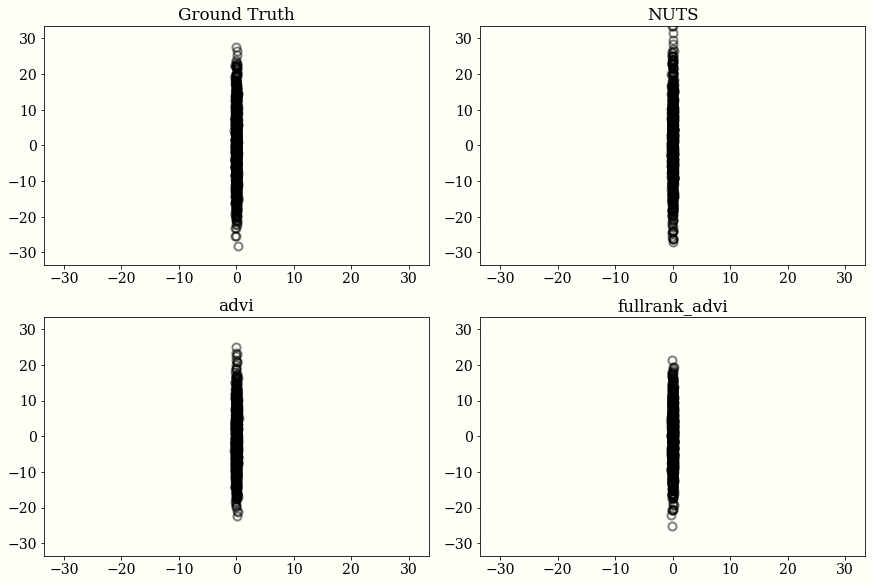

In [12]:
sample_and_plot(Ω)

### Strongly correlated Gaussian

Sequential sampling (1 chains in 1 job)
NUTS: [Ω]
Sampling chain 0, 0 divergences: 100%|██████████| 1500/1500 [00:06<00:00, 242.34it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Average Loss = 2.7394: 100%|██████████| 30000/30000 [00:13<00:00, 2303.17it/s]
Finished [100%]: Average Loss = 2.744
  0%|          | 0/30000 [00:00<?, ?it/s]/home/colin/miniconda3/envs/bayes_course/lib/python3.6/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
/home/colin/miniconda3/envs/bayes_course/lib/python3.6/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `

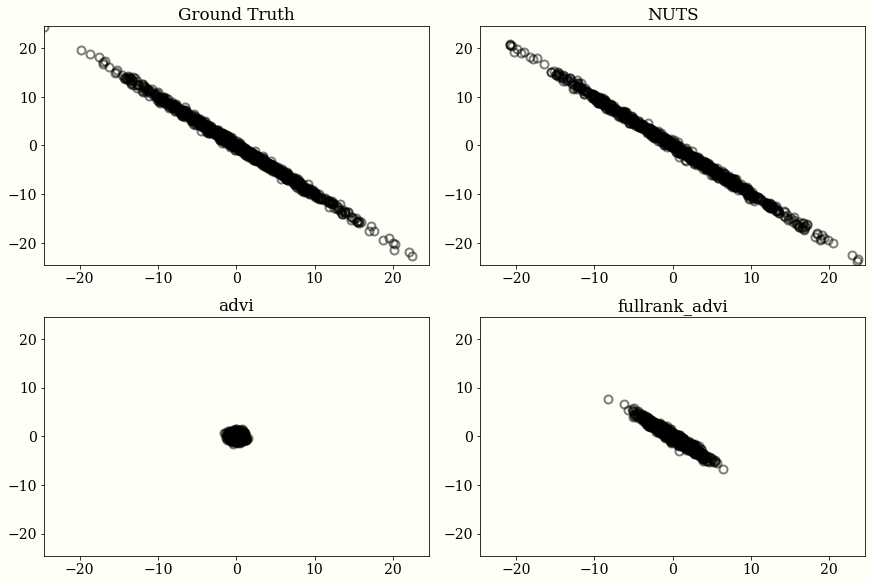

In [13]:
mu = tt.zeros(2,)
cov = tt.as_tensor([[50.05, -49.95], [-49.95, 50.05]])
Ω = pm.MvNormal.dist(mu=mu, cov=cov, shape=2, testval=mu)

sample_and_plot(Ω)

### Mixture of Gaussians

Sequential sampling (1 chains in 1 job)
NUTS: [Ω]
Sampling chain 0, 0 divergences: 100%|██████████| 1500/1500 [00:03<00:00, 462.12it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Average Loss = 5.969: 100%|██████████| 30000/30000 [00:34<00:00, 869.93it/s] 
Finished [100%]: Average Loss = 5.9217
  0%|          | 0/30000 [00:00<?, ?it/s]/home/colin/miniconda3/envs/bayes_course/lib/python3.6/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
/home/colin/miniconda3/envs/bayes_course/lib/python3.6/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead 

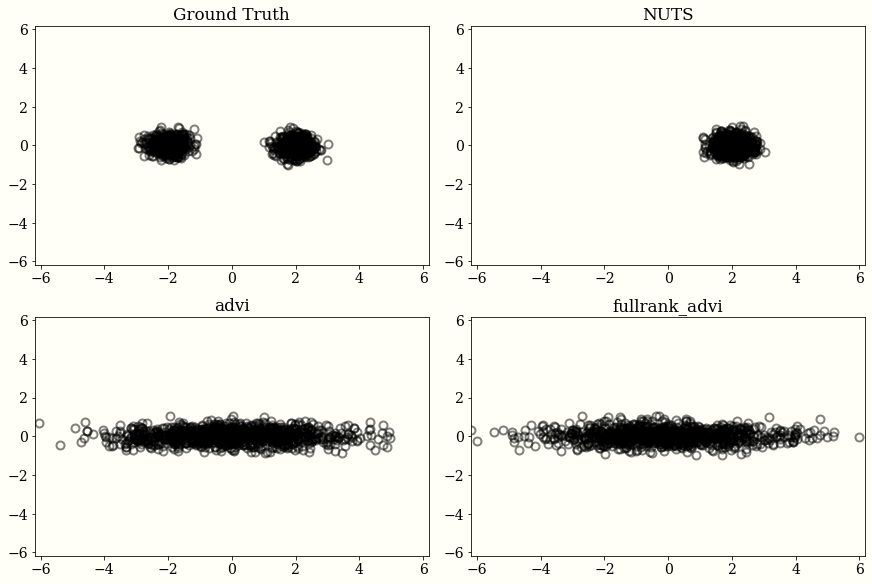

In [14]:
class MoG(object):
    def __init__(self, centers, sds):
        covs = [tt.as_tensor([[sd, 0], [0, sd]]) for sd in sds]

        self.rvs = [pm.MvNormal.dist(mu=center, cov=cov, shape=2) for center, cov in zip(centers, covs)]
        
    def random(self, size=1):
        return np.array([rv.random() for rv in np.random.choice(self.rvs, size=size)])
    
    def logp(self, value):
        return pm.math.logsumexp([rv.logp(value) for rv in self.rvs]) - np.log(len(self.rvs))

sample_and_plot(MoG(centers=[np.array([-2, 0]), np.array([2, 0])], sds=[0.1, 0.1]))

### Mixture of Gaussians with different scale

Sequential sampling (1 chains in 1 job)
NUTS: [Ω]
Sampling chain 0, 0 divergences: 100%|██████████| 1500/1500 [00:02<00:00, 535.59it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Average Loss = 0.70752: 100%|██████████| 30000/30000 [00:30<00:00, 977.24it/s] 
Finished [100%]: Average Loss = 0.70748
  0%|          | 0/30000 [00:00<?, ?it/s]/home/colin/miniconda3/envs/bayes_course/lib/python3.6/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
/home/colin/miniconda3/envs/bayes_course/lib/python3.6/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` inste

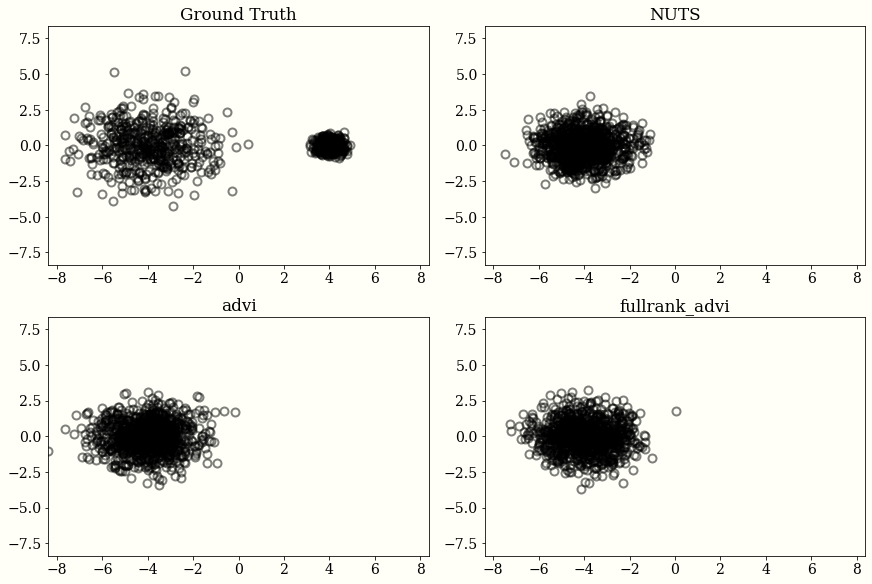

In [15]:
sample_and_plot(MoG(centers=[np.array([-4, 0]), np.array([4, 0])], sds=[2, 0.1]))

Sequential sampling (1 chains in 1 job)
NUTS: [Ω]
Sampling chain 0, 0 divergences: 100%|██████████| 1500/1500 [00:03<00:00, 482.25it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Average Loss = 12.136: 100%|██████████| 30000/30000 [00:47<00:00, 627.73it/s]
Finished [100%]: Average Loss = 12.218
  0%|          | 0/30000 [00:00<?, ?it/s]/home/colin/miniconda3/envs/bayes_course/lib/python3.6/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
/home/colin/miniconda3/envs/bayes_course/lib/python3.6/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead 

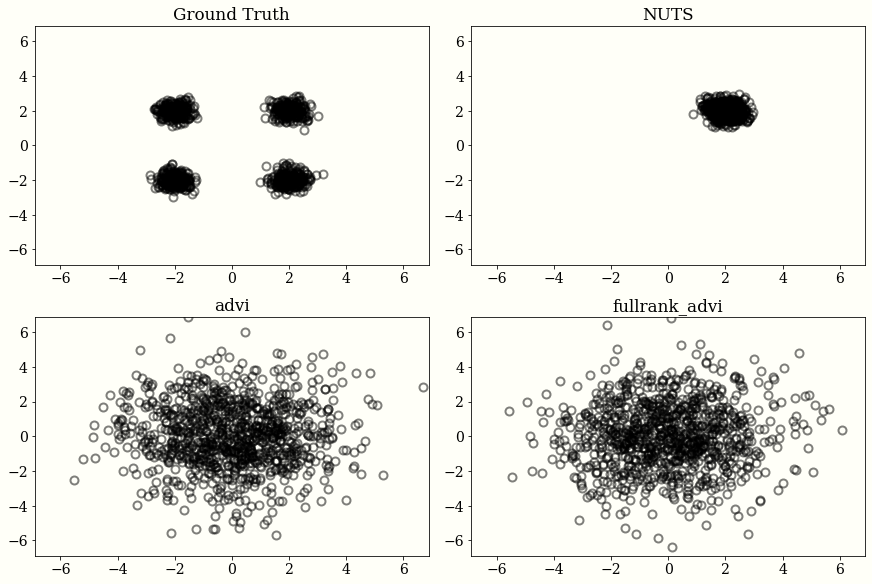

In [16]:
sample_and_plot(MoG(centers=[np.array([-2, -2]), np.array([2, -2]), np.array([-2, 2]), np.array([2, 2])], sds=[0.1, 0.1, 0.1, 0.1]))

### Mixture of non axis-aligned Gaussians

Sequential sampling (1 chains in 1 job)
NUTS: [Ω]
Sampling chain 0, 0 divergences: 100%|██████████| 1500/1500 [00:02<00:00, 570.26it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Average Loss = 8.8355: 100%|██████████| 30000/30000 [00:28<00:00, 1059.28it/s]
Finished [100%]: Average Loss = 8.8206
  0%|          | 0/30000 [00:00<?, ?it/s]/home/colin/miniconda3/envs/bayes_course/lib/python3.6/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
/home/colin/miniconda3/envs/bayes_course/lib/python3.6/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead

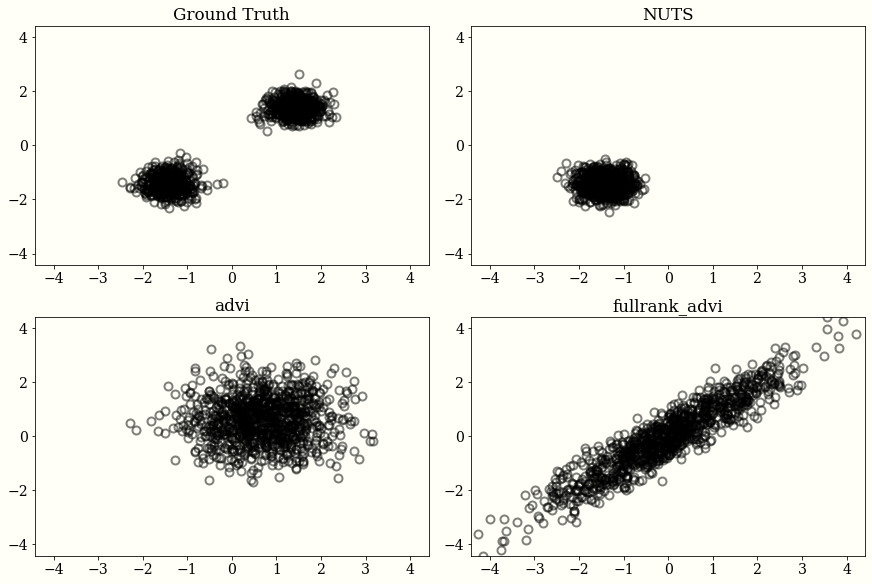

In [17]:
θ = np.pi / 4
rot_45 = np.array([[np.cos(θ), -np.sin(θ)], [np.sin(θ), np.cos(θ)]])
Ω = MoG(centers=[rot_45.dot(np.array([-2, 0])), rot_45.dot(np.array([2, 0]))], sds=[0.1, 0.1])

sample_and_plot(Ω)

# Getting 1,000 samples of a linear regression model in different Probabilistic Programming Languages

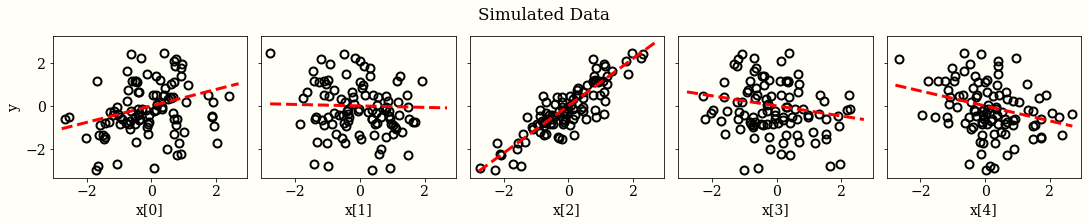

In [18]:
# Trailing underscore means the model has no access to the variable
np.random.seed(0)

ndims = 5
ndata = 100
X = np.random.randn(ndata, ndims)
w_ = np.random.randn(ndims)

noise_ = 0.1 * np.random.randn(ndata)
y_obs = X.dot(w_) + noise_


fig, axes = plt.subplots(sharey=True, ncols=ndims, figsize=(15, 3))

t = np.linspace(X.min(), X.max())
for idx, (ax, x) in enumerate(zip(axes.ravel(), X.T)):
    ax.plot(x, y_obs, 'o');
    ax.plot(t, w_[idx] * t, 'r--')
    ax.set_xlabel(f'x[{idx}]')
axes[0].set_ylabel('y')
fig.suptitle('Simulated Data');

## The Model

We have generated a linear regression dataset with 5 dimensions and 100 datapoints. 

In each library, we will define the joint probability distribution

$$
p(\mathbf{w}) \sim \mathcal{N}(\mathbf{0}, I_5)\\
p(\mathbf{y} | X, \mathbf{w}) \sim \mathcal{N}(X\mathbf{w}, 0.1I_{100}),
$$
where $I_5$ is a $5 \times 5$ identity matrix, and $I_{100}$ a $100 \times 100$ identity.

We then provide code to sample 1,000 draws from the posterior distribution: 

$$
p(\mathbf{w} | X, \mathbf{y}) \propto p(\mathbf{y} | X, \mathbf{w}) p(\mathbf{w})
$$

Note that in this case we can just do the math, and the actual posterior is

$$
p(\mathbf{w} | X, \mathbf{y}) = \mathcal{N}((X^TX + I_5)^{-1}X^Ty, (X^TX + I_5)^{-1})
$$



## PyMC3

- Uses `theano`
- Sampler is NUTS
- Does advanced tuning

```bash
pip install pymc3
```

https://docs.pymc.io/

In [19]:
%%time
import pymc3 as pm
import theano.tensor as tt

with pm.Model():
    w = pm.Normal('w', 0, 1, shape=ndims)
    y = pm.Normal('y', tt.dot(X, w), 0.1, observed=y_obs)
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [00:02<00:00, 2102.75draws/s]


## PyStan

- Uses `Stan`, a stand-alone progamming language specialized to probabilistic programs
- Self-rolled auto-differentiation
- Sampler is NUTS
- Does advanced tuning

```bash
pip install pystan
```


https://pystan.readthedocs.io

In [20]:
%%time
import pystan

linear_regression = """
data {
  int<lower=0> N;   // number of data items
  int<lower=0> K;   // number of predictors
  matrix[N, K] X;   // predictor matrix
  vector[N] y;      // outcome vector
}
parameters {
  vector[K] w;       // coefficients for predictors
}
model {
  y ~ normal(X * w, 0.1);  // likelihood
}
"""

linear_data = {'N': ndata,
               'K': ndims,
               'y': y_obs,
               'X': X
              }

sm = pystan.StanModel(model_code=linear_regression)
fit = sm.sampling(data=linear_data, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_37b8e41c9d58148edcdc9d099a42ee4b NOW.


In [21]:
pystan.__version__

'2.19.0.0'

## emcee

- Affine invariant ensemble MCMC sampler
- No gradients - limited scaling with dimension
- Well tested, easy to install

```bash
pip install emcee
```

https://emcee.readthedocs.io

In [22]:
%%time
import scipy.stats as st

import emcee

# log likelihood
def lnlike(w, X, y):
    model = X.dot(w) 
    inv_sigma2 = 0.1 ** -2
    return -0.5*(np.sum((y-model)**2)*inv_sigma2 - np.log(inv_sigma2))

# Define a prior for w
w_rv = st.multivariate_normal(np.zeros(ndims), np.eye(ndims))

# Log probability for w
lnprior = w_rv.logpdf

# logp(w | X, y) = logp(y | X, w) + logp(w)
def lnprob(w, X, y):
    return lnprior(w) + lnlike(w, X, y)

nwalkers = 100
pos = w_rv.rvs(size=nwalkers)
sampler = emcee.EnsembleSampler(nwalkers, ndims, lnprob, args=(X, y_obs))

pos, lprob, rstate  = sampler.run_mcmc(pos, 1000)

In [23]:
emcee.__version__

'3.0.0'

## Tensorflow Probability

- "scipy-stats, with gradients"
- Also has MCMC algorithms, keras layers with uncertainty
- Built on tensorflow, well integrated into ecosystem
- Has NUTS, HMC, _some_ tuning
- Massively parallel

```bash
pip install tensorflow-probability
```
https://www.tensorflow.org/probability

In [24]:
%%time
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

X_tensor = tf.convert_to_tensor(X, dtype='float32')

@tf.function
def target_log_prob_fn(w):
    w_dist = tfd.Normal(loc=tf.zeros((ndims, 1)), scale=1.0, name="w")
    w_prob = tf.reduce_sum(w_dist.log_prob(w))
    y_dist = tfd.Normal(loc=tf.matmul(X_tensor, w), scale=0.1, name="y")
    y_prob = tf.reduce_sum(y_dist.log_prob(y_obs.reshape(-1, 1)))
    return w_prob + y_prob


# Initialize the HMC transition kernel.
num_results = 1000
num_burnin_steps = 500
adaptive_hmc = tfp.mcmc.SimpleStepSizeAdaptation(
    tfp.mcmc.HamiltonianMonteCarlo(
        target_log_prob_fn=target_log_prob_fn,
        num_leapfrog_steps=4,
        step_size=0.01),
    num_adaptation_steps=int(num_burnin_steps * 0.8))

samples, is_accepted = tfp.mcmc.sample_chain(
    num_results=num_results,
    num_burnin_steps=num_burnin_steps,
    current_state=tf.zeros((ndims, 1)),
    kernel=adaptive_hmc,
    trace_fn=lambda _, pkr: pkr.inner_results.is_accepted)

In [25]:
tfp.__version__

'0.8.0'

## Pyro

- Built on pytorch
- Has HMC, NUTS, not sure on tuning
- Used to be focused on variational inference, has done more MCMC

```bash
install pyro-ppl 
```

https://pyro.ai/

In [26]:
%%time
import pyro
import torch
from pyro.infer.mcmc import NUTS, MCMC
import pyro.distributions as dist


def model(X):
    w = pyro.sample('w', dist.Normal(torch.zeros(ndims), torch.ones(ndims)))
    y = pyro.sample('y', dist.Normal(torch.matmul(X, w), 0.1 * torch.ones(ndata)), obs=torch.as_tensor(y_obs, dtype=torch.float32))
    return y

nuts_kernel = NUTS(model, adapt_step_size=True)
py_mcmc = MCMC(nuts_kernel, num_samples=1_000, warmup_steps=500)

py_mcmc = py_mcmc.run(torch.as_tensor(X, dtype=torch.float32))

sample: 100%|██████████| 1500/1500 [00:15<00:00, 95.99it/s, step size=8.61e-01, acc. prob=0.840] 


In [27]:
pyro.__version__

'0.5.0'

## Numpyro

- Built on `jax`
- Same team as pyro
- Has NUTS, HMC
- Small and quick

```bash
pip install git+https://github.com/pyro-ppl/numpyro.git
```

In [28]:
%%time
import jax.numpy as jnp
from jax import random

import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS


def model(X=None):
    w = numpyro.sample('w', dist.Normal(jnp.zeros(ndims), jnp.ones(ndims)))
    y = numpyro.sample('y', dist.Normal(jnp.dot(X, w), 0.1 * jnp.ones(ndata)), obs=jnp.array(y_obs))
    return y

rng_ = random.PRNGKey(0)

kernel = NUTS(model)
mcmc = MCMC(kernel, 500, 1000)
mcmc.run(rng_, X=X)

sample: 100%|██████████| 1500/1500 [00:08<00:00, 179.10it/s, 7 steps of size 6.72e-01. acc. prob=0.90] 


In [29]:
numpyro.__version__

'0.2.0'

## Brancher

- Doesn't actually implement MCMC, I think. Does variational inference.
- Beautiful!
- Built on pytorch

```python
pip install brancher
```

https://brancher.org/

In [30]:
%%time
from brancher.variables import ProbabilisticModel
from brancher.standard_variables import NormalVariable
from brancher import inference
import brancher.functions as BF

import torch

# Model
w = NormalVariable(loc=torch.zeros(ndims), scale=1., name="w")
y = NormalVariable(loc=BF.matmul(torch.as_tensor(X, dtype=torch.float32), w), scale=0.1, name="y")

y.observe(y_obs)
model = ProbabilisticModel([w, y])

## Edward 2

- Built on tensorflow and tensorflow probability
- Mostly a model building language!
- Installed with tensorflow probability, for 2 more months
- Inference is with tensorflow probability

```bash
pip install git+https://github.com/google/edward2.git
```

In [31]:
%%time
import edward2 as ed
import tensorflow as tf

X_tensor = tf.convert_to_tensor(X, dtype='float32')

def linear_regression(X):
    """Bayesian logistic regression p(y | x) = int p(y | x, w, b) p(w, b) dwdb."""
    w = ed.Normal(loc=tf.zeros((ndims, 1)), scale=1.0, name="w")
    y = ed.Normal(loc=tf.matmul(X, w), scale=0.1, name='y')
    return y

log_joint = ed.make_log_joint_fn(linear_regression)


def target_log_prob_fn(w):
    """Target log-probability as a function of states."""
    return log_joint(X_tensor,
                     w=w,
                     y=y_obs.reshape(-1, 1))

# Initialize the HMC transition kernel.
num_results = 1000
num_burnin_steps = 500

adaptive_hmc = tfp.mcmc.SimpleStepSizeAdaptation(
    tfp.mcmc.HamiltonianMonteCarlo(
        target_log_prob_fn=target_log_prob_fn,
        num_leapfrog_steps=4,
        step_size=0.01),
    num_adaptation_steps=int(num_burnin_steps * 0.8))

ed_samples, is_accepted = tfp.mcmc.sample_chain(
    num_results=num_results,
    num_burnin_steps=num_burnin_steps,
    current_state=tf.zeros((ndims, 1)),
    kernel=adaptive_hmc,
    trace_fn=lambda _, pkr: pkr.inner_results.is_accepted)

## PyMC4
- Built on tensorflow and tensorflow probability
- Very alpha
- Mostly a modelling layer still
- Uses HMC, and the tuning is still not very good!

```bash
pip install git+https://github.com/pymc-devs/pymc4.git
```

In [32]:
%%time
import pymc4

@pymc4.model()
def linear_model():
    w = yield pymc4.distributions.Normal('w', loc=np.zeros((5, 1)), scale=1.)
    y = yield pymc4.distributions.Normal('y', loc=tf.matmul(X, w), scale=0.1)
    
trace = pymc4.inference.sampling.sample(linear_model())

In [33]:
pymc4.__version__

'0.0.1'